In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#Imputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("../Data/state_econ.csv")
df

,State,Year,gini,min_wage,unemployment,GDP (in millions USD),Population,Residents with Bachelor's Degree or Higher,GDP per Capita,% with College Degree,Union Membership %,Adjusted Household Income,Unadjusted Household Income
0,Alabama,2010,0.4720,7.25,10.375000,175470.1,4785298.0,439863.0,36668.583649,9.191967,10.1,43464.0,47624.0
1,Alaska,2010,0.4220,7.75,8.133333,52947.7,713985.0,83346.0,74158.000518,11.673354,22.9,63648.0,69739.0
2,Arizona,2010,0.4550,7.25,10.300000,248125.3,6413737.0,691889.0,38686.541091,10.787611,6.4,47044.0,51546.0
3,Arkansas,2010,0.4580,6.25,7.858333,100970.8,2921606.0,252888.0,34560.033078,8.655787,4.0,39018.0,42752.0
4,California,2010,0.4710,8.00,12.458333,1973511.9,37349363.0,4610875.0,52839.238517,12.345257,17.5,57020.0,62477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Virginia,2019,0.4690,7.25,2.758333,556905.2,8535519.0,1312800.0,65245.616582,15.380436,11.2,92610.0,92610.0
496,Washington,2019,0.4577,13.50,4.233333,612996.5,7614893.0,1204728.0,80499.686601,15.820682,4.0,93910.0,93910.0
497,West Virginia,2019,0.4644,8.75,4.933333,78863.9,1792147.0,161686.0,44005.262961,9.021916,10.2,61170.0,61170.0
498,Wisconsin,2019,0.4391,7.25,3.166667,349416.5,5822434.0,829878.0,60012.101468,14.253111,8.1,76720.0,76720.0


In [3]:
df = df.drop(["GDP (in millions USD)", "Population", "Unadjusted Household Income"], axis = 1)

In [4]:
df = df.set_index(["State", "Year"])
scaleddf = StandardScaler().fit_transform(df)

scaleddf

array([[ 0.53189031, -0.2681927 ,  2.06257411, ..., -1.60842599,
         0.00306234, -1.32542821],
       [-2.02527465,  0.06521444,  1.06216944, ..., -0.4180065 ,
         2.54838743,  0.34867599],
       [-0.33754577, -0.2681927 ,  2.02910332, ..., -0.84293254,
        -0.73269569, -1.02849534],
       ...,
       [ 0.14320124,  0.73202871, -0.36591753, ..., -1.69000594,
         0.0229477 ,  0.14314536],
       [-1.15072423, -0.2681927 , -1.15434055, ...,  0.81960451,
        -0.3946447 ,  1.43289568],
       [-1.38598341, -1.66850268, -0.9088881 , ...,  0.04804099,
        -0.55372752,  1.22305206]])

In [5]:
features = scaleddf[:, 1:]
labels = scaleddf[:, 0]
trainvec, testvec, trainlabel, testlabel = train_test_split(features, labels, test_size=0.2, random_state= 12)
#print(features[:,], labels)

In [6]:
#param_grid = {'C': [1000.0, 10000.0,100000],
              #'gamma': [0.0001, 0.001, 0.01,0.1]}
param_grid = {'C': [0.1,1,10]}
clf = GridSearchCV(SVR(kernel="linear"), param_grid)

results = clf.fit(trainvec, trainlabel)
error = mean_squared_error(testlabel, clf.predict(testvec))
print("Mean squared error =",error)
print("R^2 =", r2_score(testlabel, clf.predict(testvec)))

Mean squared error = 0.8645875683575663
R^2 = 0.274560136099922


In [7]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

Best estimator found by grid search:
SVR(C=0.1, kernel='linear')
Best parameters found by grid search:
{'C': 0.1}


In [8]:
pred_labels = clf.predict(testvec)

#print(y_test)
#print(pred_labels)


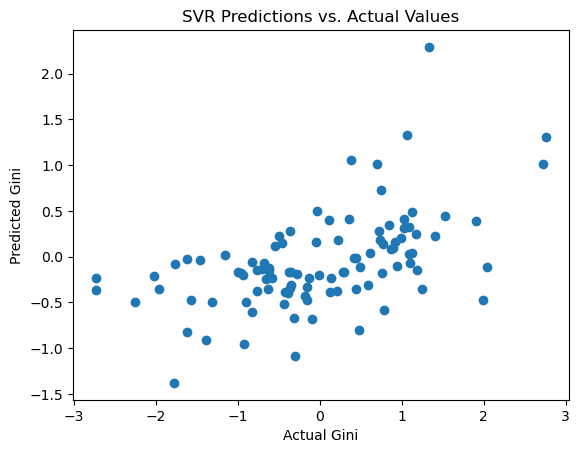

In [9]:
plt.scatter(testlabel, pred_labels)
plt.xlabel("Actual Gini")
plt.ylabel("Predicted Gini")
plt.title("SVR Predictions vs. Actual Values")
plt.show()

The feature min_wage has an importance of 0.1551739431084605
The feature unemployment has an importance of -0.11878013151200051
The feature Residents with Bachelor's Degree or Higher has an importance of 0.4827419162096047
The feature GDP per Capita has an importance of 0.10298854680995399
The feature % with College Degree has an importance of -0.14961859438748298
The feature Union Membership % has an importance of 0.06773673983651095
The feature Adjusted Household Income has an importance of -0.38797598921945886


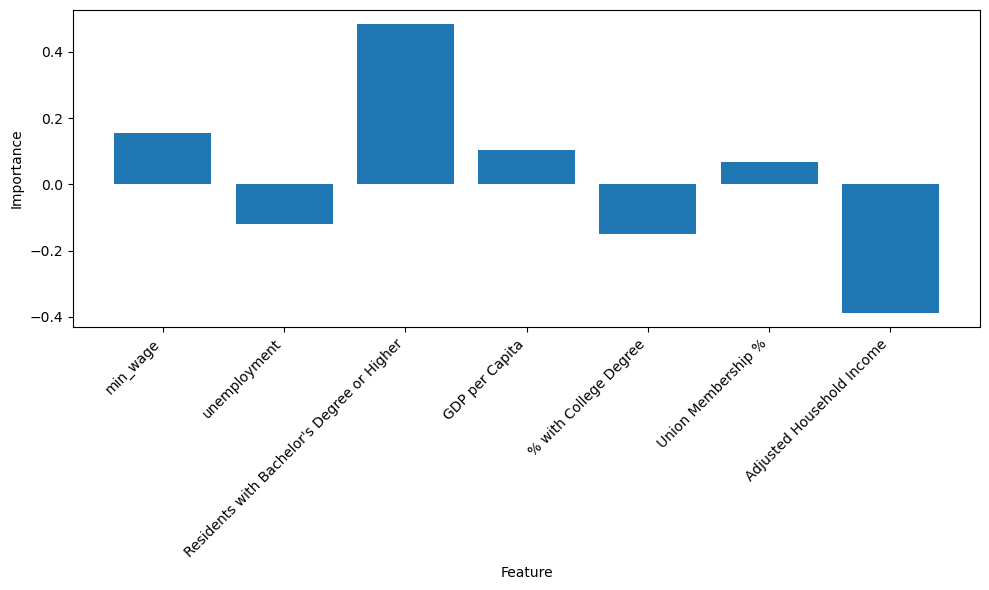

In [10]:
best_estimator = clf.best_estimator_
importance = best_estimator.coef_
arr1 = ["min_wage","unemployment","Residents with Bachelor's Degree or Higher","GDP per Capita","% with College Degree","Union Membership %","Adjusted Household Income"]
arr2 = []
for v in importance:
    for i in v:
        arr2.append(i)
for i in range(len(arr1)):
    print("The feature", arr1[i], "has an importance of", arr2[i])

plt.figure(figsize=(10, 6))  # Increase figure size for better spacing
plt.bar(arr1, arr2)

# Rotate x-axis labels for improved readability
plt.xticks(rotation=45, ha="right")

# Adjust label size if needed
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()

# Show the plot
plt.show()



Mean squared error = 0.4135935074271314
R^2 = 0.6529707010385695


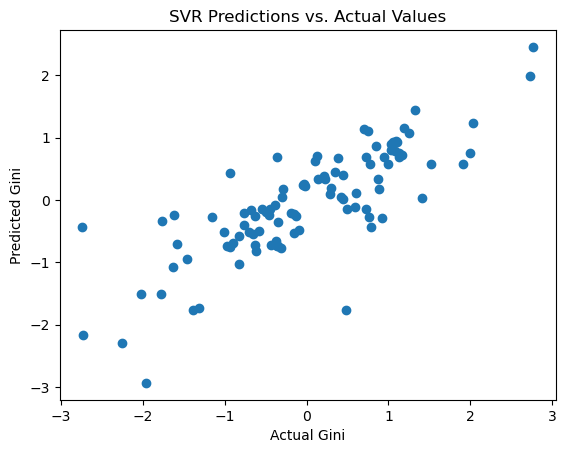

In [11]:
param_grid = {'C': [1000.0],
              'gamma': [0.0001, 0.001, 0.01,0.1],
              'kernel': ['rbf']}
clf = GridSearchCV(SVR(), param_grid)

results = clf.fit(trainvec, trainlabel)
error = mean_squared_error(testlabel, clf.predict(testvec))
print("Mean squared error =",error)
pred_labels = clf.predict(testvec)
print("R^2 =", r2_score(testlabel, clf.predict(testvec)))
plt.scatter(testlabel, pred_labels)
plt.xlabel("Actual Gini")
plt.ylabel("Predicted Gini")
plt.title("SVR Predictions vs. Actual Values")
plt.show()